### ECE1513: Tutorial 7
#### Review Gradient Descent Algorithm -- Introduction to PyTorch: autograd feature	


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

#### 1. Review of Gradient Descent

In [65]:
# Function: f(x) = x^2 (convex function)
def function(x):
    return x**2

# Derivative: f'(x) = 2x
def gradient(x):
    return 2 * x

Iteration 1: x = 8.0, f(x) = 64.0
Iteration 2: x = 6.4, f(x) = 40.96000000000001
Iteration 3: x = 5.12, f(x) = 26.2144
Iteration 4: x = 4.096, f(x) = 16.777216
Iteration 5: x = 3.2768, f(x) = 10.73741824
Iteration 6: x = 2.62144, f(x) = 6.871947673600001
Iteration 7: x = 2.0971520000000003, f(x) = 4.398046511104002
Iteration 8: x = 1.6777216000000004, f(x) = 2.8147497671065613
Iteration 9: x = 1.3421772800000003, f(x) = 1.801439850948199
Iteration 10: x = 1.0737418240000003, f(x) = 1.1529215046068475


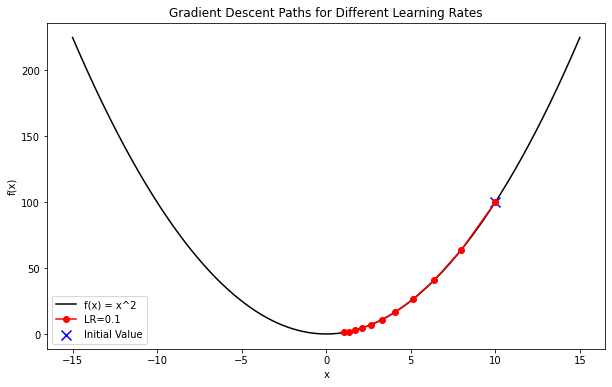

In [69]:
# Implementing Gradient Descent in NumPy
learning_rate = 0.1
initial_x = 10
num_iterations = 10
x = initial_x
x_history = [x]

for i in range(num_iterations):
    x = x - learning_rate * gradient(x)
    x_history.append(x)
    print(f"Iteration {i+1}: x = {x}, f(x) = {function(x)}")


# Plot gradient descent path
plt.figure(figsize=(10, 6))
x_vals = np.linspace(-15, 15, 1000)
y_vals = function(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = x^2", color="black")

plt.plot(x_history, [function(xi) for xi in x_history], marker="o", label=f"LR={learning_rate}", color="red")
plt.scatter(initial_x, function(initial_x), color="blue", marker="x", s=100, label="Initial Value")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Paths for Different Learning Rates")
plt.legend()
plt.show()

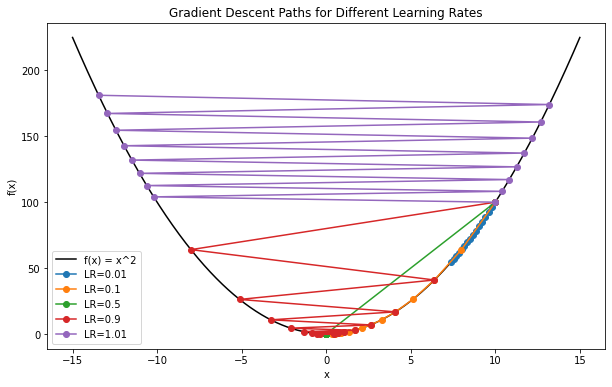

In [70]:
learning_rates = [0.01, 0.1, 0.5, 0.9, 1.01]  # Test different learning rates
initial_x = 10

# Plot gradient descent for different learning rates
plt.figure(figsize=(10, 6))
x_vals = np.linspace(-15, 15, 1000)
y_vals = function(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = x^2", color="black")

for lr in learning_rates:
    x = initial_x
    x_history = [x]

    for _ in range(15):
        x -= lr * gradient(x)
        x_history.append(x)

    plt.plot(x_history, [function(xi) for xi in x_history], marker="o", label=f"LR={lr}")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Paths for Different Learning Rates")
plt.legend()
plt.show()

#### 2. Introduction to PyTorch

In [71]:
# Creating a tensor
tensor_a = torch.tensor([2.0, 3.0, 4.0])
print("\nTensor A:", tensor_a)
print("Tensor A Shape:", tensor_a.shape)

# Creating a random tensor
tensor_r = torch.rand(3)
print("\nTensor R (random):", tensor_r)


Tensor A: tensor([2., 3., 4.])
Tensor A Shape: torch.Size([3])

Tensor R (random): tensor([0.8823, 0.9150, 0.3829])


In [72]:
# Creating a tensor with gradients enabled
tensor_b = torch.tensor([5.0], requires_grad=True)
print("Tensor B (requires grad):", tensor_b)

tensor_c = torch.Tensor([6.0])
print("Tensor C (no gradient):", tensor_c)

Tensor B (requires grad): tensor([5.], requires_grad=True)
Tensor C (no gradient): tensor([6.])


In [73]:
# Tensor operations
d = tensor_a + 10
e = tensor_a * 2
print("\nTensor Operations:")
print("A + 10 =", d)
print("A * 2 =", e)


Tensor Operations:
A + 10 = tensor([12., 13., 14.])
A * 2 = tensor([4., 6., 8.])


In [74]:
# Creating a matrix (2D tensor)
matrix = torch.tensor([[1, 2], [3, 4]])
print("\nMatrix (2D Tensor):\n", matrix)

print("Matrix shape:", matrix.shape)


Matrix (2D Tensor):
 tensor([[1, 2],
        [3, 4]])
Matrix shape: torch.Size([2, 2])


In [79]:
# Tensor multiplication
matrix_a = torch.tensor([[1, 2], [3, 4]])
matrix_b = torch.tensor([[5, 6], [7, 8]])
print(matrix_a.shape, matrix_b.shape)
result = torch.matmul(matrix_a, matrix_b)
print("\nMatrix Multiplication:")
print(matrix_a)
print(matrix_b)
print("Result:")
print(result)
print("A*B^T:")
print(matrix_a @ matrix_b.T)

torch.Size([2, 2]) torch.Size([2, 2])

Matrix Multiplication:
tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
Result:
tensor([[19, 22],
        [43, 50]])
A*B^T:
tensor([[17, 23],
        [39, 53]])


In [78]:
# Convert between NumPy and PyTorch tensors
np_array = np.array([1, 2, 3])
torch_tensor = torch.tensor(np_array)
back_to_np = torch_tensor.numpy()
print("\nNumpy to Torch:", torch_tensor)
print("Torch to Numpy:", back_to_np)


Numpy to Torch: tensor([1, 2, 3])
Torch to Numpy: [1 2 3]


In [105]:
# Taking the gradient of a tensor
tensor_b = torch.tensor([5.0], requires_grad=True)
print("Tensor B (requires grad):", tensor_b)

tensor_c = torch.Tensor([6.0])
print("Tensor C (no gradient):", tensor_c)

f = tensor_b ** 2 + tensor_c # f = b^2 + c so df/db = 2b = 2*5 = 10
print("\nFunction f:", f)

# Compute gradients
f.backward()       # f is a function of tensor_b and tensor_c but only tensor_b has requires_grad=True
print("\nGradient of e wrt tensor_b:", tensor_b.grad)
print("Gradient of e wrt tensor_c:", tensor_c.grad)

g = tensor_b ** 3
g.backward()
print("\nGradient of g wrt tensor_b:", tensor_b.grad) #tensor_b.grad was added to the previous value of 10

# Clear gradients
tensor_b.grad.zero_()
print("\nGradient of tensor_b after zeroing:", tensor_b.grad)


Tensor B (requires grad): tensor([5.], requires_grad=True)
Tensor C (no gradient): tensor([6.])

Function f: tensor([31.], grad_fn=<AddBackward0>)

Gradient of e wrt tensor_b: tensor([10.])
Gradient of e wrt tensor_c: None

Gradient of g wrt tensor_b: tensor([85.])

Gradient of tensor_b after zeroing: tensor([0.])


In [85]:
# multi-variable function
tensor_b = torch.tensor([5.0], requires_grad=True)
tensor_c = torch.tensor([6.0], requires_grad=True)
tensor_d = torch.tensor([7.0], requires_grad=True)

h = tensor_b * tensor_c + torch.exp(tensor_d) # h = b*c + e^d so dh/db = c = 6, dh/dc = b = 5, dh/dd = e^d = e^7
print("\nFunction h:", h)

# Compute gradients
h.backward()
print("\nGradient of h wrt tensor_b:", tensor_b.grad)
print("Gradient of h wrt tensor_c:", tensor_c.grad)
print("Gradient of h wrt tensor_d:", tensor_d.grad)


Function h: tensor([1126.6332], grad_fn=<AddBackward0>)

Gradient of h wrt tensor_b: tensor([6.])
Gradient of h wrt tensor_c: tensor([5.])
Gradient of h wrt tensor_d: tensor([1096.6332])


In [86]:
# Create a tensor with requires_grad=True
x_torch = torch.tensor(10.0, requires_grad=True)

# Compute function and apply autograd
y_torch = x_torch**2
y_torch.backward()  # Compute derivative

print("\nUsing PyTorch autograd:")
print(f"Gradient at x = 10: {x_torch.grad}")


Using PyTorch autograd:
Gradient at x = 10: 20.0


#### 3. Brief review of SVM in SKlearn

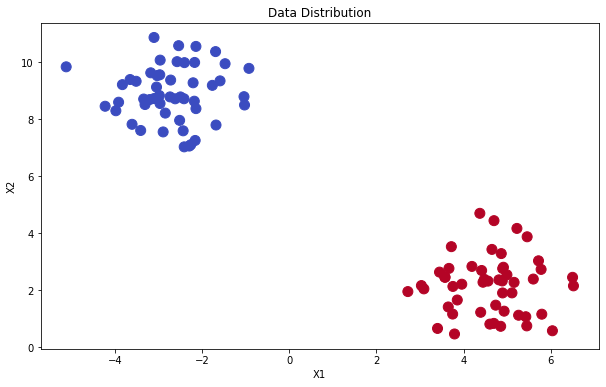

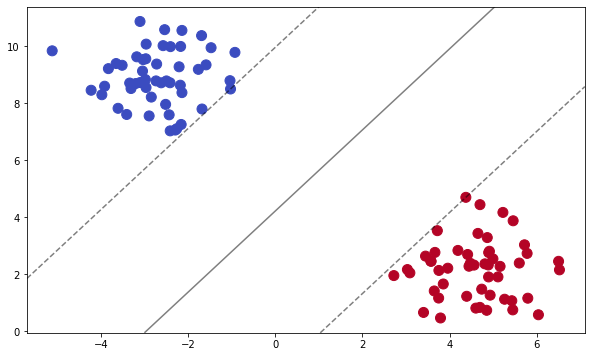

In [106]:
# generate synthetic data
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

np.random.seed(42)
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Data Distribution")
plt.show()

# Fit the model
model = SVC(kernel='linear', C=.05)
model.fit(X, y)

#visualize the decision boundary
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.show()

plot_decision_boundary(model, X, y)